In [10]:
import numpy as np 
import pandas as pd 
  
import matplotlib.pyplot as plt

In [11]:
#importing the dataset 
df = pd.read_csv("china_gdp.csv")
df.head(10)
       

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


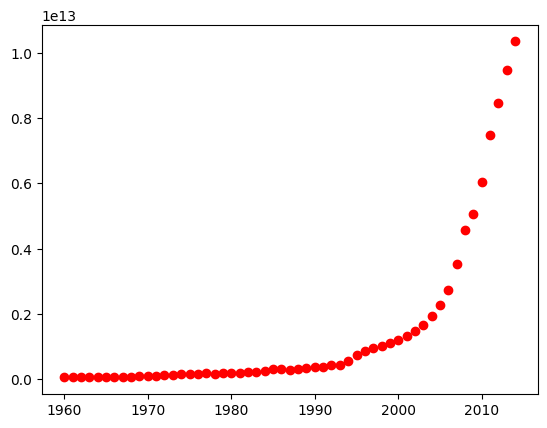

In [12]:
#visulizing the dataset
x_data , y_data = (df["Year"].values , df["Value"].values)
plt.plot(x_data , y_data , 'ro')


In [14]:
#initializing the parameter
def sigmoid(x ,Beta_1 , Beta_2):
    y = 1/(1+np.exp(-Beta_1 * 1*(x-Beta_2)))
    return y 

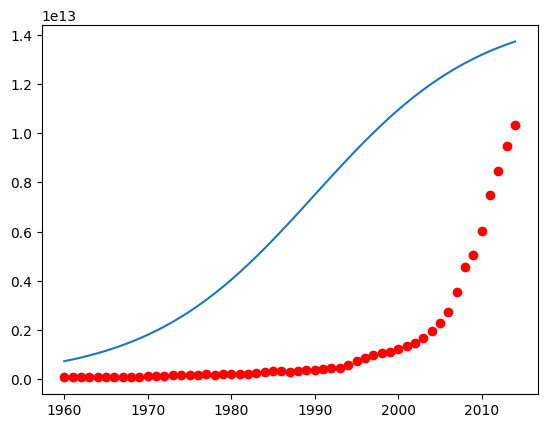

In [19]:
beta_1 = 0.10
beta_2 = 1990.0
#logistic function 
Y_pred = sigmoid(x_data , beta_1 , beta_2)
#plot the inital prediction against datapoint 
plt.plot(x_data , Y_pred*15000000000000.)
plt.plot(x_data , y_data , 'ro')


#fitting our parameter using the curve fit


In [22]:
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)

In [25]:
from  scipy.optimize import curve_fit
popt , pcov = curve_fit(sigmoid , xdata , ydata)
#print the final  paremeter 
print("beta_1 =%f , beta_2 = %f" % (popt[0] , popt[1]))

beta_1 =690.451712 , beta_2 = 0.997207


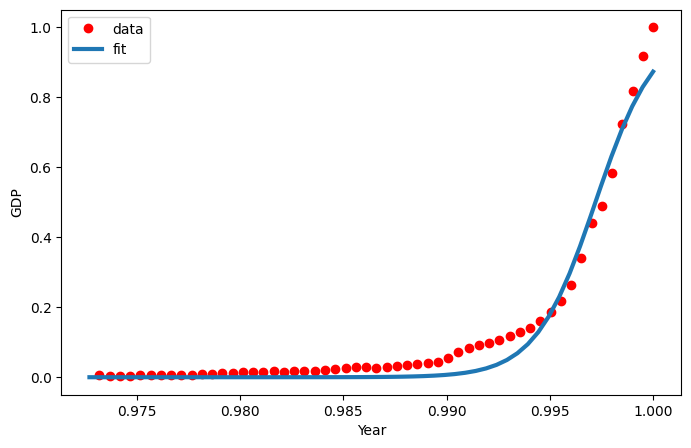

In [26]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [29]:
#testing the accuracy of the model 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(xdata , ydata , test_size=0.2 , random_state=42)
popt , pcov = curve_fit(sigmoid , X_train ,y_train)
y_hat =sigmoid(X_test , *popt)
from sklearn.metrics import r2_score
print("the r2 score is = " , r2_score(y_test , y_hat))

the r2 score is =  0.9787577776117046


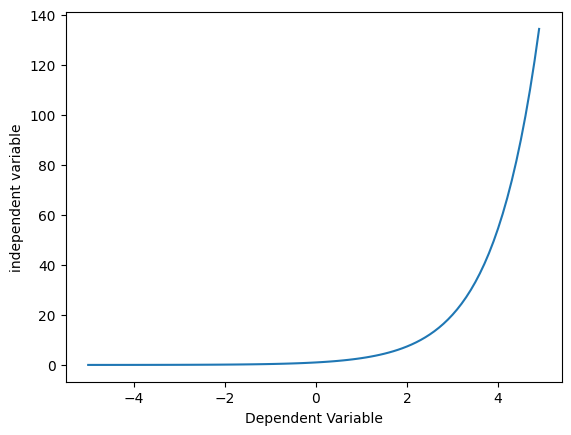

In [35]:
A = np.arange(-5.0 , 5.0 , 0.1)
B = np.exp(A)

plt.plot (A,B)
plt.xlabel("Dependent Variable")
plt.ylabel("independent variable")
plt.show()